In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [3]:
classifier = Sequential()

classifier.add(Conv2D(filters = 128,kernel_size = (3,3),activation = 'relu', input_shape = (40,40,3)))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(.2))

classifier.add(Flatten())

classifier.add(Dense(units = 128,activation = 'relu'))
classifier.add(Dropout(.2))

classifier.add(Dense(12,activation = 'softmax'))

classifier.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])


In [3]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 38, 38, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 19, 19, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 19, 19, 128)       0         
                                                                 
 flatten (Flatten)           (None, 46208)             0         
                                                                 
 dense (Dense)               (None, 128)               5914752   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                        

In [4]:
from keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile

In [5]:
ImageFile.LOAD_TRUNCATED_IMAGES = True
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range=.2,rotation_range=25)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('D://trail//Train',target_size = (40,40),batch_size = 32,class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('D://trail//Test',target_size = (40,40),batch_size = 32,class_mode = 'categorical')

Found 2880 images belonging to 12 classes.
Found 720 images belonging to 12 classes.


In [6]:
test_labels=test_set.classes
train_labels=training_set.classes


In [28]:
#Get another batch from the iterator
batch = test_set.next()
batch

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

In [8]:
classifier.fit(training_set,epochs = 100,batch_size=32,validation_data=test_set,)

Epoch 1/100
90/90 [==============================] - 61s 665ms/step - loss: 1.9799 - accuracy: 0.3760 - val_loss: 0.7563 - val_accuracy: 0.7597
Epoch 2/100
90/90 [==============================] - 21s 234ms/step - loss: 0.8776 - accuracy: 0.7090 - val_loss: 0.5026 - val_accuracy: 0.8236
Epoch 3/100
90/90 [==============================] - 19s 208ms/step - loss: 0.6845 - accuracy: 0.7660 - val_loss: 0.4279 - val_accuracy: 0.8486
Epoch 4/100
90/90 [==============================] - 18s 204ms/step - loss: 0.5526 - accuracy: 0.8184 - val_loss: 0.3393 - val_accuracy: 0.8847
Epoch 5/100
90/90 [==============================] - 19s 212ms/step - loss: 0.4763 - accuracy: 0.8333 - val_loss: 0.3148 - val_accuracy: 0.8875
Epoch 6/100
90/90 [==============================] - 20s 226ms/step - loss: 0.4350 - accuracy: 0.8556 - val_loss: 0.2840 - val_accuracy: 0.9042
Epoch 7/100
90/90 [==============================] - 19s 212ms/step - loss: 0.3607 - accuracy: 0.8833 - val_loss: 0.3074 - val_accuracy:

In [9]:
classifier.evaluate(test_set)

23/23 [==============================] - 1s 33ms/step - loss: 0.6514 - accuracy: 0.9250


[0.651416540145874, 0.925000011920929]

In [10]:
print(test_set)


In [4]:
x_pred = classifier.predict(test_set)
x_pred=x_pred.argmax(axis=1)
print(len(x_pred));


NameError: name 'test_set' is not defined

<AxesSubplot:>

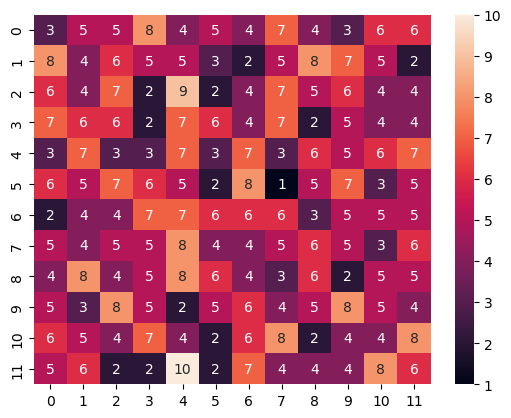

In [18]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(test_labels, x_pred)

import seaborn as sns
df_cm = pd.DataFrame(cf)
#plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)